<a href="https://colab.research.google.com/github/Mercymerine/Machine_learning2/blob/main/Customer_personality_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
marketing = pd.read_csv('/content/marketing_campaign.csv', sep='\t')
marketing.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [3]:
marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [4]:
#Converting the date column to datetime
marketing['Dt_Customer'] = pd.to_datetime(marketing['Dt_Customer'], format='%d-%m-%Y' )

In [5]:
marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [6]:
marketing.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

In [7]:
marketing.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [8]:

#Replacing the missing values with the mean
mean_income = marketing['Income'].median()

marketing['Income'] = marketing['Income'].fillna(mean_income)


In [9]:
marketing['Income'].mean()

52237.97544642857

In [10]:
marketing['Income'].median()

51381.5

In [11]:
marketing.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [12]:
marketing.drop(['ID', 'Z_CostContact', 'Z_Revenue' ], axis=1, inplace=True)

In [13]:
marketing['Education'].value_counts()

Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64

In [14]:
marketing['Marital_Status'].value_counts()

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [15]:
marketing['Teenhome'].value_counts()

Teenhome
0    1158
1    1030
2      52
Name: count, dtype: int64

In [16]:
marketing['NumDealsPurchases'].value_counts()

NumDealsPurchases
1     970
2     497
3     297
4     189
5      94
6      61
0      46
7      40
8      14
9       8
15      7
10      5
11      5
12      4
13      3
Name: count, dtype: int64

In [17]:
marketing.describe()

,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
count,2240.000000,2240.000000,2240.000000,2240.000000,2240,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,1968.805804,52237.975446,0.444196,0.506250,2013-07-10 10:01:42.857142784,49.109375,303.935714,26.302232,166.950000,37.525446,...,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,0.149107
min,1893.000000,1730.000000,0.000000,0.000000,2012-07-30 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1959.000000,35538.750000,0.000000,0.000000,2013-01-16 00:00:00,24.000000,23.750000,1.000000,16.000000,3.000000,...,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1970.000000,51381.500000,0.000000,0.000000,2013-07-08 12:00:00,49.000000,173.500000,8.000000,67.000000,12.000000,...,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1977.000000,68289.750000,1.000000,1.000000,2013-12-30 06:00:00,74.000000,504.250000,33.000000,232.000000,50.000000,...,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1996.000000,666666.000000,2.000000,2.000000,2014-06-29 00:00:00,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
std,11.984069,25037.955891,0.538398,0.544538,NaN,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.356274


**DATA ANALYSIS**

In [18]:
marketing.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response'],
      dtype='object')

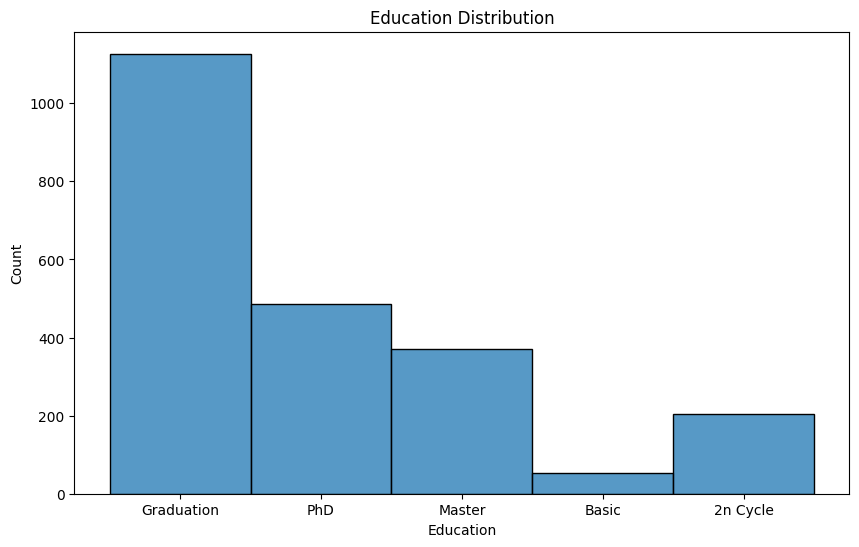

In [19]:
#Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=marketing, x='Education')
plt.title('Education Distribution')
plt.xlabel('Education')
plt.ylabel('Count')
plt.show()

Most customers are graduants the least having basic education?

Is there a relationship between level of education and income?

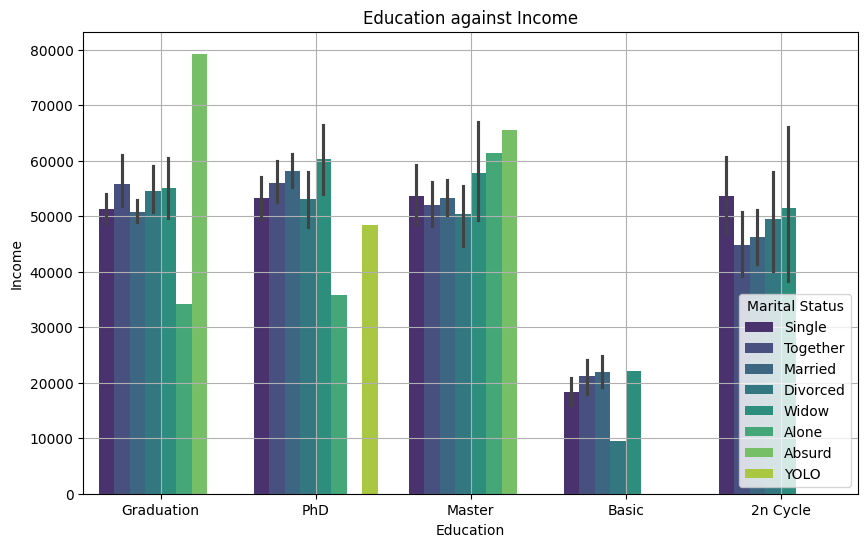

In [39]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Education', y='Income', hue='Marital_Status', data=marketing, palette='viridis')
plt.title('Education against Income')
plt.xlabel('Education')
plt.ylabel('Income')
plt.legend(title='Marital Status')
plt.grid(True)
plt.show()

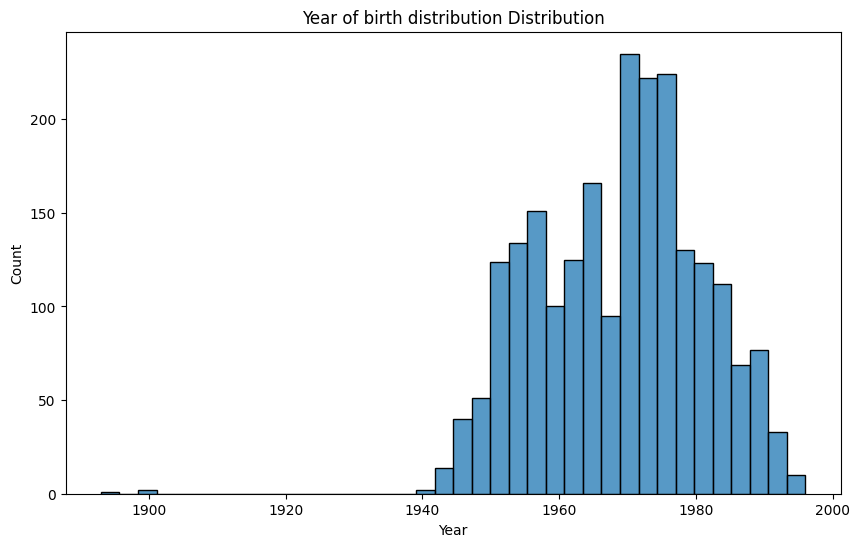

In [20]:
#Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=marketing, x='Year_Birth')
plt.title('Year of birth distribution Distribution')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

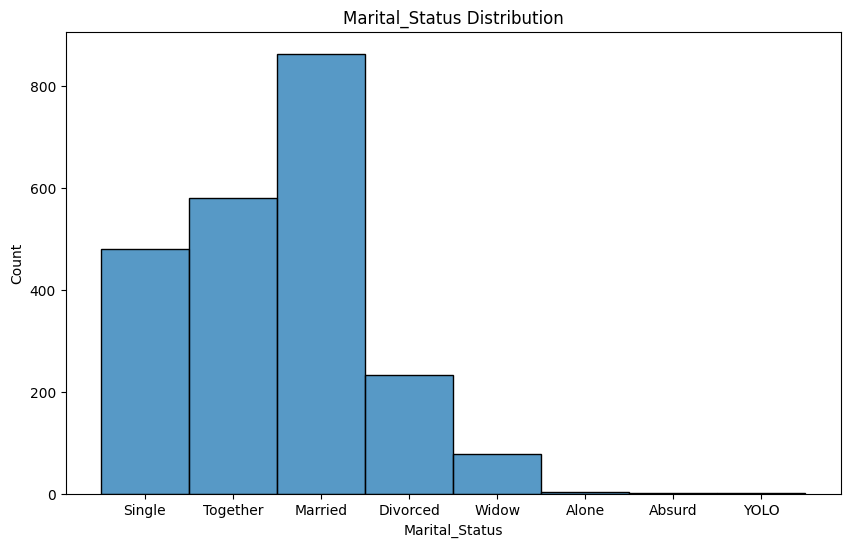

In [21]:
#Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=marketing, x='Marital_Status')
plt.title('Marital_Status Distribution')
plt.xlabel('Marital_Status')
plt.ylabel('Count')
plt.show()

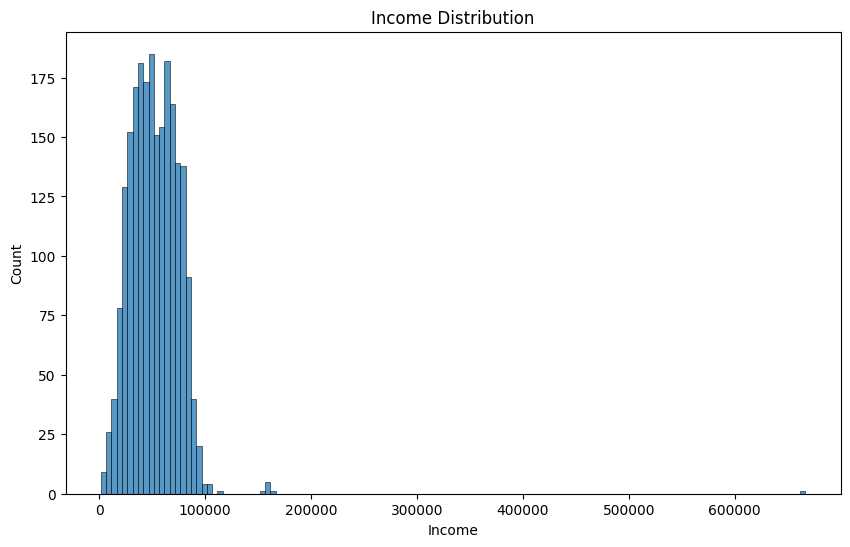

In [22]:
#Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=marketing, x='Income')
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Count')
plt.show()

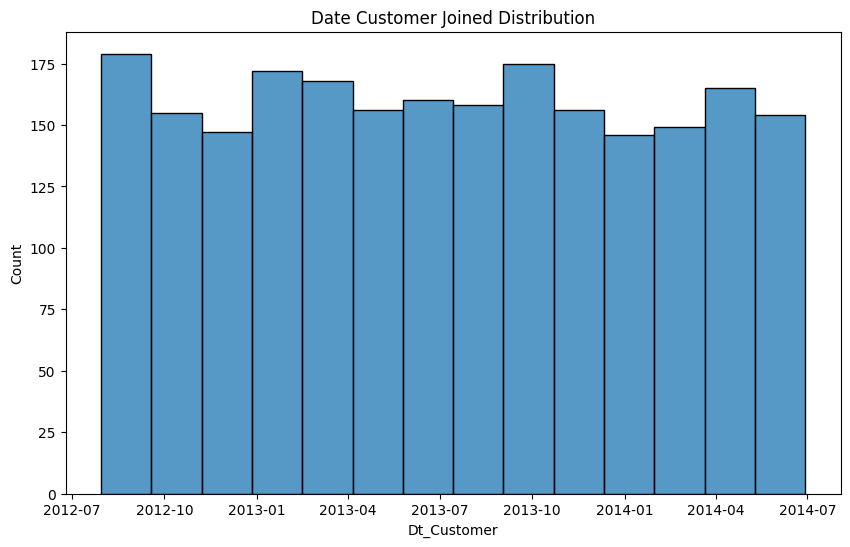

In [23]:
#Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=marketing, x='Dt_Customer')
plt.title('Date Customer Joined Distribution')
plt.xlabel('Dt_Customer')
plt.ylabel('Count')
plt.show()

This is an almost perfect uniform distribution implying that yearly almost the same number of customers join specifically in the month of: January, April, August and October

In [ ]:
#Line graph

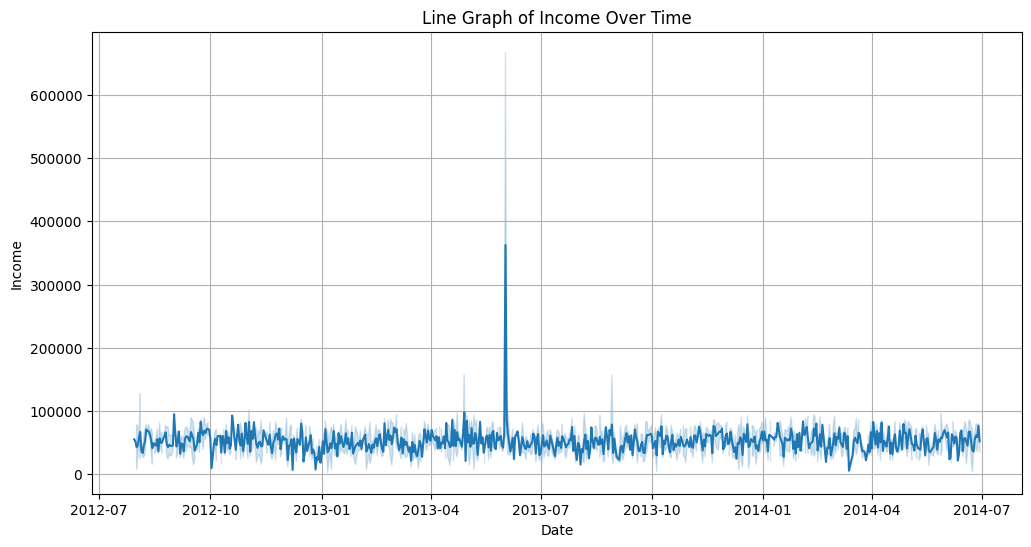

In [37]:
# Create the line graph
plt.figure(figsize=(12, 6))
sns.lineplot(x='Dt_Customer', y='Income', data=marketing)
plt.title('Line Graph of Income Over Time')
plt.xlabel('Date')
plt.ylabel('Income')
plt.grid(True)
plt.show()

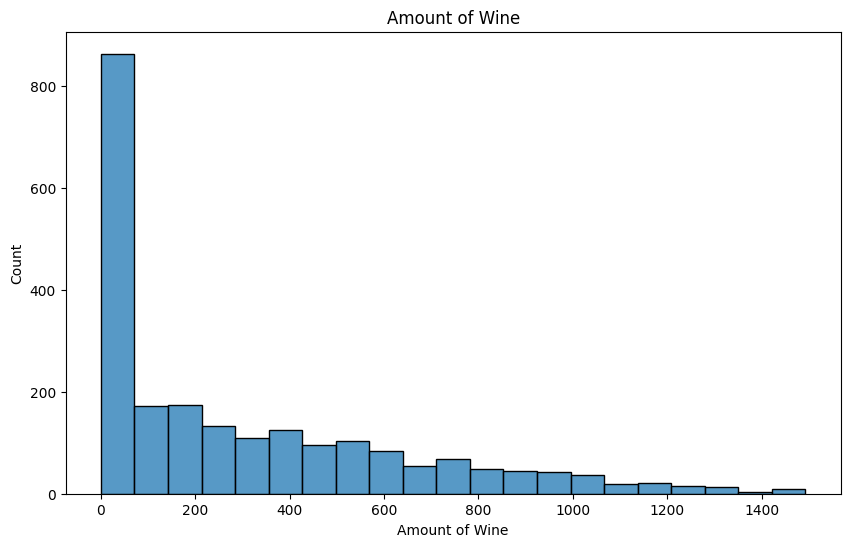

In [24]:
#Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=marketing, x='MntWines')
plt.title('Amount of Wine')
plt.xlabel('Amount of Wine')
plt.ylabel('Count')
plt.show()

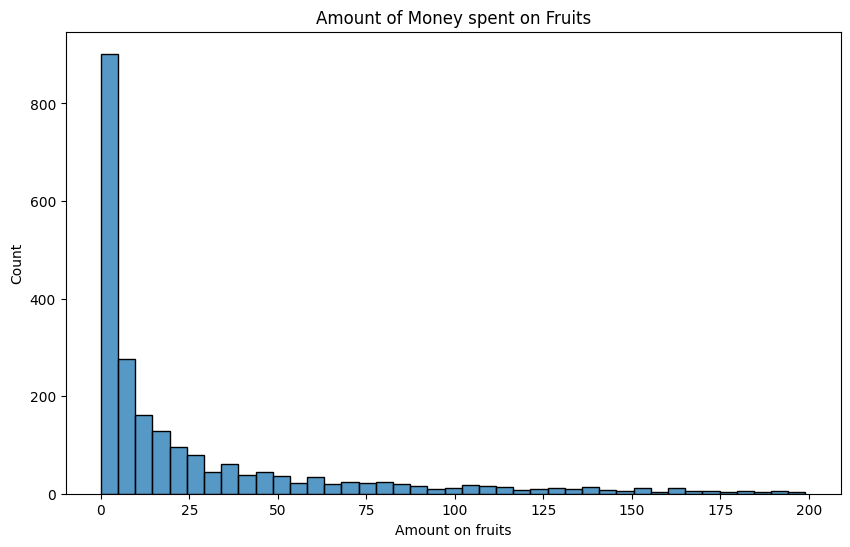

In [25]:
#Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=marketing, x='MntFruits')
plt.title('Amount of Money spent on Fruits')
plt.xlabel('Amount on fruits')
plt.ylabel('Count')
plt.show()

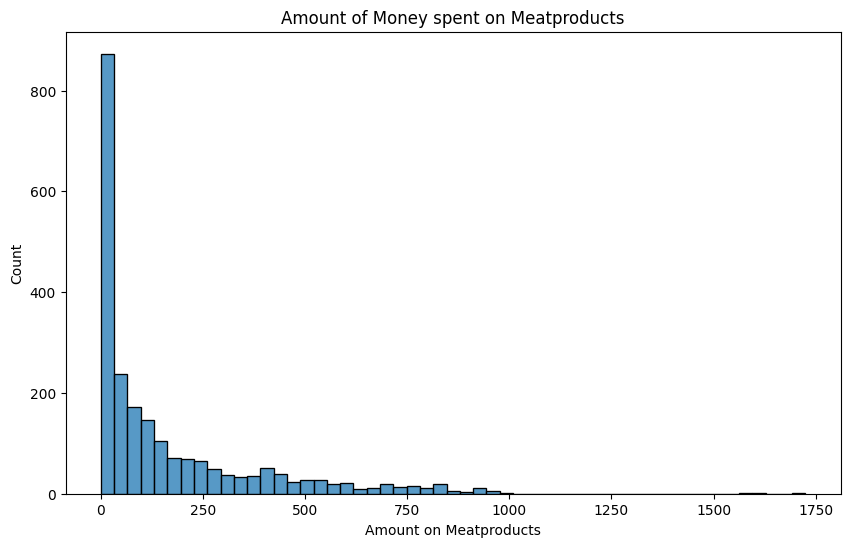

In [26]:
#Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=marketing, x='MntMeatProducts')
plt.title('Amount of Money spent on Meatproducts')
plt.xlabel('Amount on Meatproducts')
plt.ylabel('Count')
plt.show()

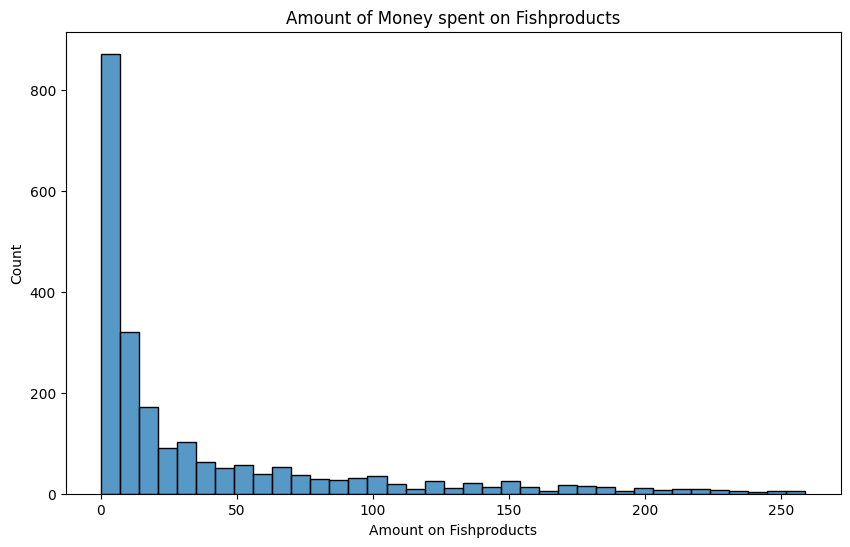

In [27]:
#Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=marketing, x='MntFishProducts')
plt.title('Amount of Money spent on Fishproducts')
plt.xlabel('Amount on Fishproducts')
plt.ylabel('Count')
plt.show()

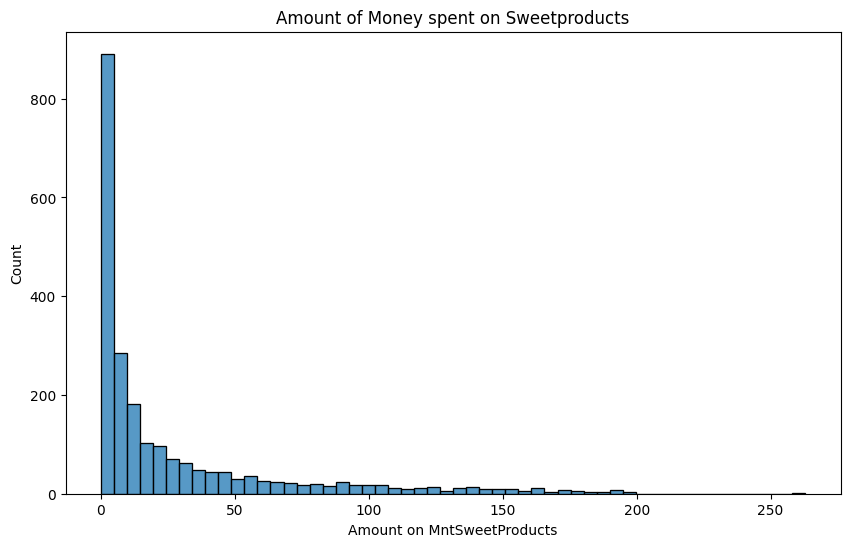

In [28]:
#Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=marketing, x='MntSweetProducts')
plt.title('Amount of Money spent on Sweetproducts')
plt.xlabel('Amount on MntSweetProducts')
plt.ylabel('Count')
plt.show()

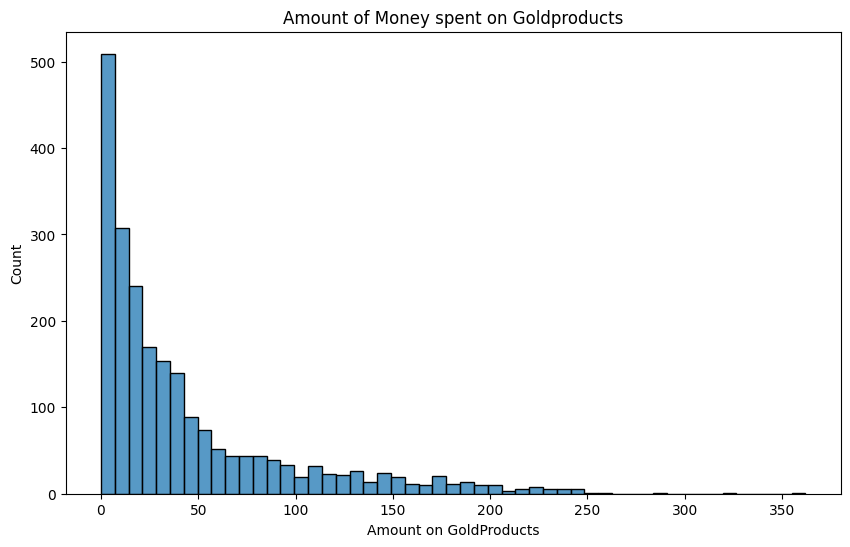

In [29]:
#Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=marketing, x='MntGoldProds')
plt.title('Amount of Money spent on Goldproducts')
plt.xlabel('Amount on GoldProducts')
plt.ylabel('Count')
plt.show()

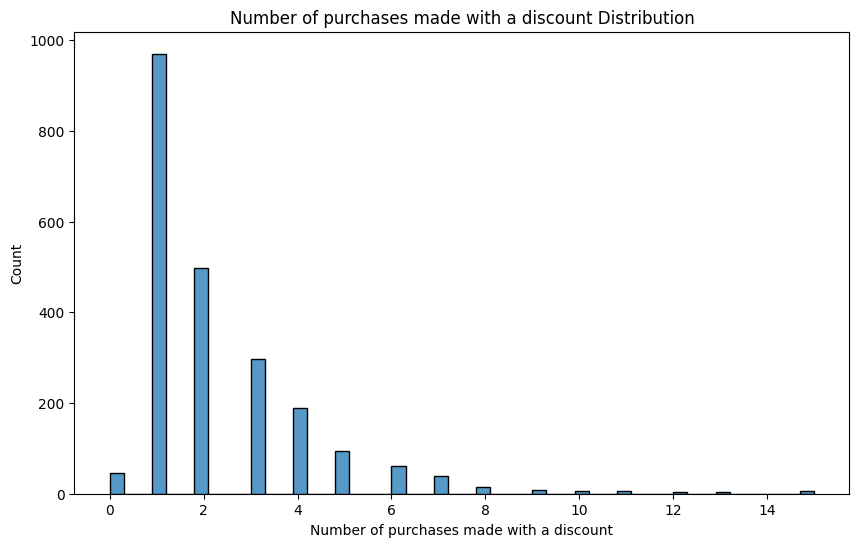

In [30]:
#Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=marketing, x='NumDealsPurchases')
plt.title('Number of purchases made with a discount Distribution')
plt.xlabel('Number of purchases made with a discount')
plt.ylabel('Count')
plt.show()

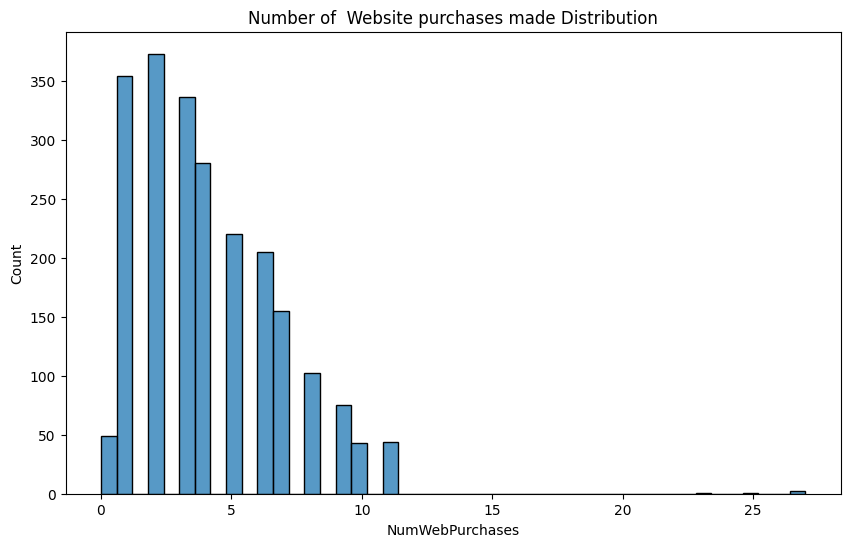

In [31]:
#Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=marketing, x='NumWebPurchases')
plt.title('Number of  Website purchases made Distribution')
plt.xlabel('NumWebPurchases')
plt.ylabel('Count')
plt.show()

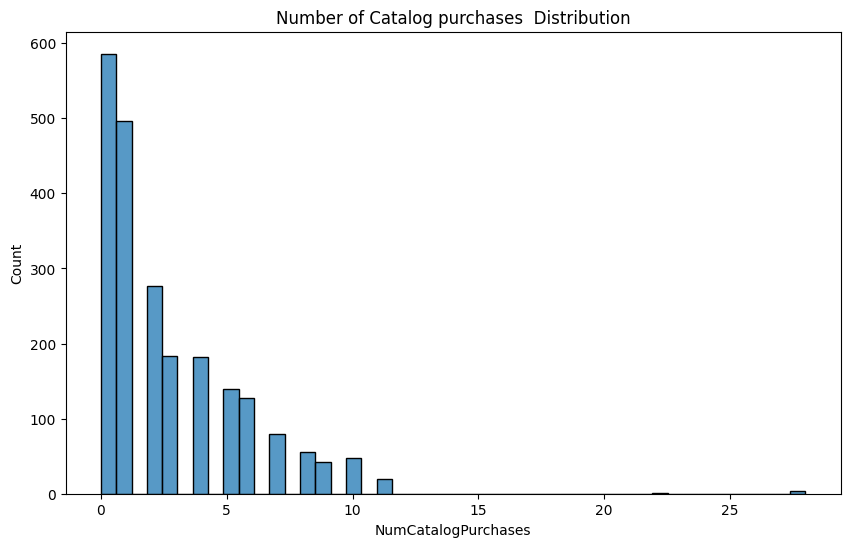

In [32]:
#Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=marketing, x='NumCatalogPurchases')
plt.title('Number of Catalog purchases  Distribution')
plt.xlabel('NumCatalogPurchases')
plt.ylabel('Count')
plt.show()

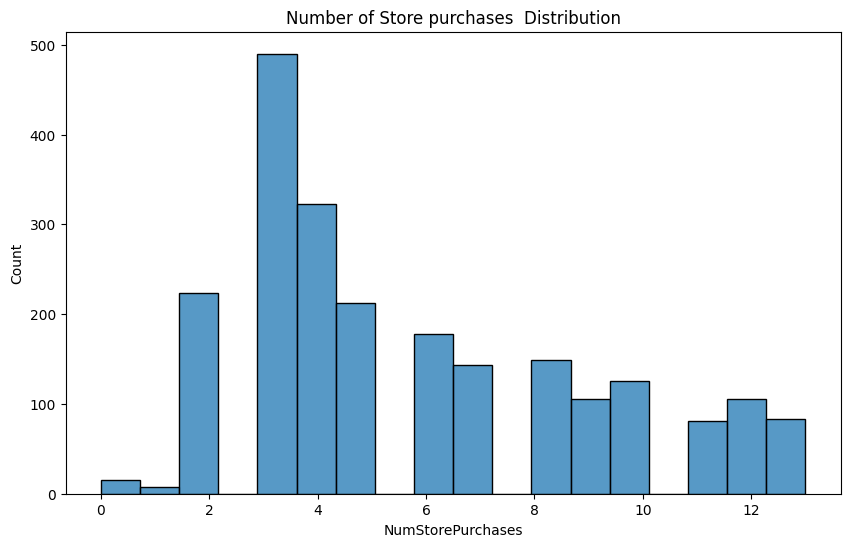

In [33]:
#Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=marketing, x='NumStorePurchases')
plt.title('Number of Store purchases  Distribution')
plt.xlabel('NumStorePurchases')
plt.ylabel('Count')
plt.show()

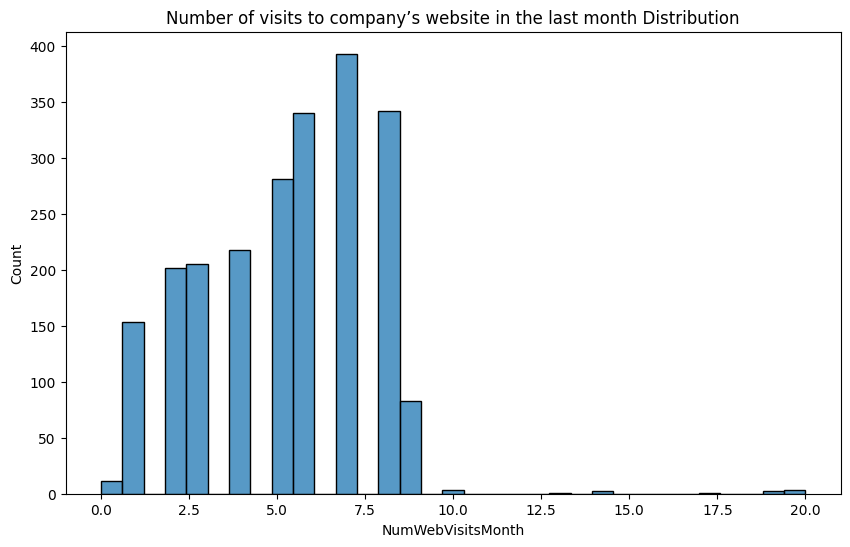

In [34]:
#Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=marketing, x='NumWebVisitsMonth')
plt.title('Number of visits to company’s website in the last month Distribution')
plt.xlabel('NumWebVisitsMonth')
plt.ylabel('Count')
plt.show()

**Encoding**

In [40]:
marketing.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response'],
      dtype='object')

In [ ]:
marketing_encoding = ['Education', 'Marital_Status']